# Turning on the Jupyter Auto-Completor

In [1]:
%config Completer.use_jedi = False

# Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Getting the Training Dataset

In [3]:
df = pd.read_csv('IMDBTrainingDatasetForComments.csv')

In [4]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
print("Number of rows in dataset: ", df.shape[0])
print("Number of columns in dataset: ", df.shape[1])

Number of rows in dataset:  50000
Number of columns in dataset:  2


# Text Pre-processing

1. Removing HTML Tags from the comments.
2. Removing punctuations from the comments.
3. Removing the Stopwords from the comments and converting everything to LowerCase.
4. Stemming/Lemmatization of comments.
5. Combining every pre-process applied on comment.

In [7]:
text = df['review'][0]
text

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

## Removing HTML Tags from the comments.

In [8]:
def removeHTMLTags(text):
    return BeautifulSoup(text, 'lxml').text

In [9]:
%%time
text = removeHTMLTags(text)
text

CPU times: total: 0 ns
Wall time: 998 µs


"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

## Removing punctuations from the comments.

In [10]:
def removePunctuations(text):
    return re.sub(r'[^\w\s]', '', text)

In [11]:
%%time
text = removePunctuations(text)
text

CPU times: total: 0 ns
Wall time: 0 ns


'One of the other reviewers has mentioned that after watching just 1 Oz episode youll be hooked They are right as this is exactly what happened with meThe first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordIt is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayI would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare Forget pretty pictur

## Removing the Stopwords from the comments and converting everything to LowerCase.

In [12]:
lst_stopwords = stopwords.words('english')
print(lst_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
def removeStopWords(text):
    words = []
    for word in text.split():
        if word.lower() not in lst_stopwords:
            words.append(word.lower())
    text = ' '.join(words)
    return text

In [14]:
text = removeStopWords(text)
text

'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle 

## Stemming/Lemmatization of comments.

In [15]:
stemmer = PorterStemmer()

In [16]:
def wordStemmer(text):
    words = []
    for word in text.split():
        word = stemmer.stem(word)
        words.append(word)
    text = ' '.join(words)
    return text

In [17]:
text = wordStemmer(text)
text

'one review mention watch 1 oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom c

## Combining every pre-process applied on comment.

In [18]:
def dataPreProcessing(text):
    text = str(text)
    text = BeautifulSoup(text, 'lxml').text
    text = re.sub(r'[^\w\s]', '', text)
    words = []
    for word in text.split():
        if word.lower() not in lst_stopwords:
            word = stemmer.stem(word)
            words.append(word)
    text = ' '.join(words)
    text.strip()
    return text

In [19]:
print(dataPreProcessing(df['review'][0]))
print("\n")
print(dataPreProcessing(df['review'][100]))

one review mention watch 1 oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom co

In [20]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Splitting the entire Dataset into 2 parts for training and testing purpose

In [21]:
type(df)

pandas.core.frame.DataFrame

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df, df.sentiment, test_size=0.2, random_state=42, stratify=df.sentiment)

In [23]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [24]:
le1 = LabelEncoder()
y_test = le1.fit_transform(y_test)
y_test

array([0, 0, 1, ..., 0, 1, 0])

In [25]:
print("Shape of Training Dataset: ", X_train.shape, y_train.shape)
print("Shape of Testing Dataset: ", X_test.shape, y_test.shape)

Shape of Training Dataset:  (40000, 2) (40000,)
Shape of Testing Dataset:  (10000, 2) (10000,)


In [26]:
X_train.head()

,review,sentiment
47808,I caught this little gem totally by accident b...,positive
20154,I can't believe that I let myself into this mo...,negative
43069,*spoiler alert!* it just gets to me the nerve ...,negative
19413,If there's one thing I've learnt from watching...,negative
13673,"I remember when this was in theaters, reviews ...",negative


# Now Pre-Processing the Training Data and Test Data

In [27]:
type(X_train)

pandas.core.frame.DataFrame

In [28]:
X_train = X_train.reset_index(drop=True)
X_train.head()

,review,sentiment
0,I caught this little gem totally by accident b...,positive
1,I can't believe that I let myself into this mo...,negative
2,*spoiler alert!* it just gets to me the nerve ...,negative
3,If there's one thing I've learnt from watching...,negative
4,"I remember when this was in theaters, reviews ...",negative


In [29]:
text = dataPreProcessing(X_train['review'][0])
text

'caught littl gem total accid back 1980 81 reviv theatr see two old silli scifi movi theatr pack full warn show bunch scifi short spoof get us mood somewhat amus came within second audienc hyster biggest laugh came show princess laia huge cinnamon bun instead hair head look camera give grim smile nod made even funnier gotta see chewabacca play look like muppet extrem silli stupidbut couldnt stop laugh dialogu drown laughter also know star war pretti well even funnierthey deliber poke fun dialogu realli work audienc definit 10'

In [30]:
%%time
X_train['pre_processed_data'] = X_train['review'].apply(dataPreProcessing)

CPU times: total: 1min 53s
Wall time: 1min 53s


In [31]:
type(X_test)

pandas.core.frame.DataFrame

In [32]:
X_test = X_test.reset_index(drop=True)
X_test.head()

,review,sentiment
0,"Yes, MTV there really is a way to market Daria...",negative
1,The story of the bride fair is an amusing and ...,negative
2,"A team varied between Scully and Mulder, two o...",positive
3,This was a popular movie probably because of t...,negative
4,This movie made me so angry!! Here I am thinki...,negative


In [33]:
text = dataPreProcessing(X_test['review'][0])
text

'ye mtv realli way market daria start clever teenag angstcom everyth suck make viewer feel better sucki teenag life sitcom mutat deal problemscharad use watch daria time love sit watch call movi wonder point daria tell us lead life colleg excus didnt point daria made everi episod like ok long ok matter rest sick sad world think entir thing remind scene realiti bite movi channel show documentri first time'

In [34]:
%%time
X_test['pre_processed_data'] = X_test['review'].apply(dataPreProcessing)

CPU times: total: 28.3 s
Wall time: 28.3 s


In [35]:
X_test.head()

,review,sentiment,pre_processed_data
0,"Yes, MTV there really is a way to market Daria...",negative,ye mtv realli way market daria start clever te...
1,The story of the bride fair is an amusing and ...,negative,stori bride fair amus engag one filmmak credit...
2,"A team varied between Scully and Mulder, two o...",positive,team vari sculli mulder two scientist pilot gu...
3,This was a popular movie probably because of t...,negative,popular movi probabl humor fastmov stori under...
4,This movie made me so angry!! Here I am thinki...,negative,movi made angri think here new horror movi one...


# Vectorizing the Reviews

In [36]:
type(X_train)

pandas.core.frame.DataFrame

In [37]:
cvec = CountVectorizer()

In [38]:
vec = cvec.fit(X_train['pre_processed_data'])
train_x_bow = vec.transform(X_train['pre_processed_data'])
test_x_bow = vec.transform(X_test['pre_processed_data'])

In [39]:
print(train_x_bow.shape)
print(test_x_bow.shape)

(40000, 156021)
(10000, 156021)


# Hyper-Parameter Tuning 

In [40]:
classifier = MultinomialNB()

In [41]:
range_alpha = {"alpha":[10**-2, 10**-1, 10**0, 10**1, 10**2]}
grid_search = GridSearchCV(classifier, param_grid=range_alpha, scoring="accuracy", cv=3, return_train_score=True)
grid_search.fit(train_x_bow, y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='accuracy')

In [42]:
alpha = [10**-2, 10**-1, 10**0, 10**1, 10**2]
train_acc = grid_search.cv_results_['mean_train_score']
train_std = grid_search.cv_results_['std_train_score']
test_acc = grid_search.cv_results_['mean_test_score']
test_std = grid_search.cv_results_['std_test_score']

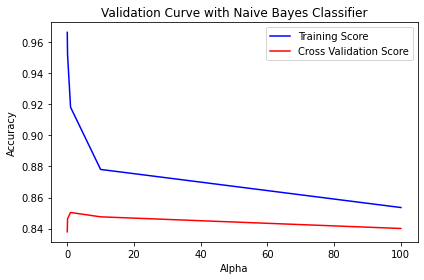

In [43]:
plt.plot(alpha, train_acc, label = "Training Score", color = 'b')
plt.plot(alpha, test_acc, label = "Cross Validation Score", color = 'r')
plt.title("Validation Curve with Naive Bayes Classifier")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [44]:
grid_search.best_estimator_

MultinomialNB(alpha=1)

# Training the Model and Predicting the results

In [45]:
classifier = MultinomialNB(alpha=1)
classifier.fit(train_x_bow, y_train)

MultinomialNB(alpha=1)

In [46]:
predict = classifier.predict(test_x_bow)

In [47]:
print("Accuracy: ", accuracy_score(y_test, predict))

Accuracy:  0.8535


In [48]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      5000
           1       0.86      0.84      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



# Finally checking for any text

In [49]:
def predictor(text):
    text = dataPreProcessing(text)
    text = [text]
    text_vec = cvec.transform(text)
    res = le.inverse_transform(classifier.predict(text_vec))[0]
    return res

In [50]:
text = "The movie was awesome and my favorite dialogue was 'Hello, Peter !'."
prediction = predictor(text)
prediction

'positive'

In [51]:
text = "Worst movie, can't even connect with the plot. More like 'Plot-Hole'"
prediction = predictor(text)
prediction

'negative'

# Using the ML Model on actual dataset

In [52]:
low_memory = False

In [53]:
actual_df = pd.read_csv('IMDBMovieDatasetComments.csv')
actual_df.head()

,Movie ID,Comment Title,Comment Writer,Comment Date,Comment,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,tt1375666,Is it possible the makers understand how incre...,srcooper-756-646671,22-Dec-20,You only get to watch this for the first time ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt1375666,Inception was only less shocking to me than th...,mrmocun,09-Aug-21,"When you wake up from a good dream, you feel t...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt1375666,Perfect for Sci-Fi Fans,mollyshelhamer,18-Nov-21,"Christopher Nolan's ""Inception"" (2010) is a co...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt4154796,So much potential lost ....,CriticalThinking2,30-Apr-19,After Infinity War I had huge expectations. Un...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt4154796,Worst Marvel Yet!!,s_bowler,04-May-19,Honestly felt like a completely different film...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
actual_df = actual_df[['Movie ID', 'Comment Title', 'Comment Writer', 'Comment Date', 'Comment']]

In [55]:
actual_df.head()

,Movie ID,Comment Title,Comment Writer,Comment Date,Comment
0,tt1375666,Is it possible the makers understand how incre...,srcooper-756-646671,22-Dec-20,You only get to watch this for the first time ...
1,tt1375666,Inception was only less shocking to me than th...,mrmocun,09-Aug-21,"When you wake up from a good dream, you feel t..."
2,tt1375666,Perfect for Sci-Fi Fans,mollyshelhamer,18-Nov-21,"Christopher Nolan's ""Inception"" (2010) is a co..."
3,tt4154796,So much potential lost ....,CriticalThinking2,30-Apr-19,After Infinity War I had huge expectations. Un...
4,tt4154796,Worst Marvel Yet!!,s_bowler,04-May-19,Honestly felt like a completely different film...


In [56]:
text = dataPreProcessing(actual_df['Comment'][0])
text

'get watch first time choos state mind care film movi dream realiti sort life best find leav cinema return whatev left enter spectacular brutal enigmat disturb beauti absorb one favourit charact ever grace screen dont see often case good like rememb secret lock away safe basement somewher perfect world us perhap cinema watch'

In [57]:
prediction = predictor(text)
prediction

'positive'

In [58]:
text = dataPreProcessing(actual_df['Comment'][3])
text

'infin war huge expect unfortun think doesnt follow comic book want kind closur stori saw lot 10 star review cannot believ major peopl like movi infin war im say wasnt entertain watch feel hero forc fit movi pay big price stori moment movi rule marvel movi broken charact build hour screen time reduc order make space other stori averag best big flaw'

In [59]:
prediction = predictor(text)
prediction

'negative'

In [60]:
%%time
actual_df['Sentiment'] = actual_df['Comment'].apply(predictor)

CPU times: total: 6min 7s
Wall time: 6min 11s


In [61]:
actual_df.head()

,Movie ID,Comment Title,Comment Writer,Comment Date,Comment,Sentiment
0,tt1375666,Is it possible the makers understand how incre...,srcooper-756-646671,22-Dec-20,You only get to watch this for the first time ...,positive
1,tt1375666,Inception was only less shocking to me than th...,mrmocun,09-Aug-21,"When you wake up from a good dream, you feel t...",positive
2,tt1375666,Perfect for Sci-Fi Fans,mollyshelhamer,18-Nov-21,"Christopher Nolan's ""Inception"" (2010) is a co...",positive
3,tt4154796,So much potential lost ....,CriticalThinking2,30-Apr-19,After Infinity War I had huge expectations. Un...,negative
4,tt4154796,Worst Marvel Yet!!,s_bowler,04-May-19,Honestly felt like a completely different film...,positive


## Further modifying the sentiments of Comments based on their title

In [62]:
text = actual_df['Comment Title'][4] + " " +actual_df['Comment'][4] 
text

'Worst Marvel Yet!! Honestly felt like a completely different film from Avengers Infinity War. In fact the film had such a different tone from all the Marvel films before.The characters changed, the story line was poor. Incredibly disappointing end to phase three'

In [63]:
prediction = predictor(text)
prediction

'negative'

In [64]:
actual_df['TitleComment'] = actual_df['Comment Title'] + " " + actual_df['Comment']

In [65]:
actual_df.head()

,Movie ID,Comment Title,Comment Writer,Comment Date,Comment,Sentiment,TitleComment
0,tt1375666,Is it possible the makers understand how incre...,srcooper-756-646671,22-Dec-20,You only get to watch this for the first time ...,positive,Is it possible the makers understand how incre...
1,tt1375666,Inception was only less shocking to me than th...,mrmocun,09-Aug-21,"When you wake up from a good dream, you feel t...",positive,Inception was only less shocking to me than th...
2,tt1375666,Perfect for Sci-Fi Fans,mollyshelhamer,18-Nov-21,"Christopher Nolan's ""Inception"" (2010) is a co...",positive,"Perfect for Sci-Fi Fans Christopher Nolan's ""I..."
3,tt4154796,So much potential lost ....,CriticalThinking2,30-Apr-19,After Infinity War I had huge expectations. Un...,negative,So much potential lost .... After Infinity War...
4,tt4154796,Worst Marvel Yet!!,s_bowler,04-May-19,Honestly felt like a completely different film...,positive,Worst Marvel Yet!! Honestly felt like a comple...


In [66]:
text = actual_df['TitleComment'][4]
text

'Worst Marvel Yet!! Honestly felt like a completely different film from Avengers Infinity War. In fact the film had such a different tone from all the Marvel films before.The characters changed, the story line was poor. Incredibly disappointing end to phase three'

In [67]:
prediction = predictor(text)
prediction

'negative'

In [68]:
%%time
actual_df['Sentiment'] = actual_df['TitleComment'].apply(predictor)

CPU times: total: 6min 6s
Wall time: 6min 9s


In [69]:
actual_df.head()

,Movie ID,Comment Title,Comment Writer,Comment Date,Comment,Sentiment,TitleComment
0,tt1375666,Is it possible the makers understand how incre...,srcooper-756-646671,22-Dec-20,You only get to watch this for the first time ...,positive,Is it possible the makers understand how incre...
1,tt1375666,Inception was only less shocking to me than th...,mrmocun,09-Aug-21,"When you wake up from a good dream, you feel t...",positive,Inception was only less shocking to me than th...
2,tt1375666,Perfect for Sci-Fi Fans,mollyshelhamer,18-Nov-21,"Christopher Nolan's ""Inception"" (2010) is a co...",positive,"Perfect for Sci-Fi Fans Christopher Nolan's ""I..."
3,tt4154796,So much potential lost ....,CriticalThinking2,30-Apr-19,After Infinity War I had huge expectations. Un...,negative,So much potential lost .... After Infinity War...
4,tt4154796,Worst Marvel Yet!!,s_bowler,04-May-19,Honestly felt like a completely different film...,negative,Worst Marvel Yet!! Honestly felt like a comple...


## Dropping the irrelevant columns 

In [70]:
actual_df = actual_df.drop(['TitleComment'], axis=1)

In [71]:
actual_df.head()

,Movie ID,Comment Title,Comment Writer,Comment Date,Comment,Sentiment
0,tt1375666,Is it possible the makers understand how incre...,srcooper-756-646671,22-Dec-20,You only get to watch this for the first time ...,positive
1,tt1375666,Inception was only less shocking to me than th...,mrmocun,09-Aug-21,"When you wake up from a good dream, you feel t...",positive
2,tt1375666,Perfect for Sci-Fi Fans,mollyshelhamer,18-Nov-21,"Christopher Nolan's ""Inception"" (2010) is a co...",positive
3,tt4154796,So much potential lost ....,CriticalThinking2,30-Apr-19,After Infinity War I had huge expectations. Un...,negative
4,tt4154796,Worst Marvel Yet!!,s_bowler,04-May-19,Honestly felt like a completely different film...,negative


## Saving the dataframe as CSV File 

In [72]:
actual_df.to_csv('IMDBCommentSentiment.csv', index = False)

# Serializing the Module

In [73]:
pickle.dump(predictor, open('SentimentDetector.pkl', 'wb'),  fix_imports=True)

## Testing the Pickled Module 

In [74]:
predictor = pickle.load(open('SentimentDetector.pkl', 'rb'))

In [75]:
text = "The movie was awesome and my favorite dialogue was 'Hello, Peter !'."
prediction = predictor(text)
prediction

'positive'

In [76]:
text = "Worst movie, can't even connect with the plot. More like 'Plot-Hole'"
prediction = predictor(text)
prediction

'negative'